# Properati: prediction of properties sales prices

#### We develop a model that predicts the sale price of properties according to its attributes.

We load the dataset and explore some of its statistics.

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf

In [2]:
data = pd.read_table('datos_properati.csv', sep=',')
data = shuffle(data)
data.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
10728,2017-10-17,sell,PH,|Argentina|Capital Federal|Parque Chacabuco|,"-34.630152,-58.4317885",-34.630152,-58.431789,69500.0,34.0,32.0,2044.117647,NaN,NaN,NaN,https://www.properati.com.ar/1gohv_venta_ph_pa...,PARQUE CHACABUCO,7.0
9181,2017-10-11,sell,apartment,|Argentina|Capital Federal|Boedo|,"-34.6242158,-58.4110815",-34.624216,-58.411082,153000.0,78.0,NaN,1961.538462,NaN,4.0,2600.0,https://www.properati.com.ar/1g5qv_venta_depar...,SAN CRISTOBAL,3.0
240,2017-09-16,sell,apartment,|Argentina|Capital Federal|Las Cañitas|,"-34.5670326,-58.4330181",-34.567033,-58.433018,445000.0,144.0,144.0,3090.277778,NaN,5.0,NaN,https://www.properati.com.ar/1ewc9_venta_depar...,PALERMO,14.0
10905,2018-01-31,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.628187,-58.4295863",-34.628187,-58.429586,209000.0,68.0,64.0,3073.529412,4.0,NaN,NaN,https://www.properati.com.ar/1kb4c_venta_depar...,PARQUE CHACABUCO,7.0
17590,2018-01-08,sell,house,|Argentina|Capital Federal|Villa Lugano|,"-34.6817313,-58.4751166",-34.681731,-58.475117,147000.0,200.0,200.0,735.000000,NaN,5.0,NaN,https://www.properati.com.ar/1jctf_venta_casa_...,VILLA LUGANO,8.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 10728 to 17720
Data columns (total 17 columns):
created_on                 18979 non-null object
operation                  18979 non-null object
property_type              18979 non-null object
place_with_parent_names    18979 non-null object
lat-lon                    18979 non-null object
lat                        18979 non-null float64
lon                        18979 non-null float64
price_aprox_usd            17445 non-null float64
surface_total_in_m2        16586 non-null float64
surface_covered_in_m2      16876 non-null float64
price_usd_per_m2           16037 non-null float64
floor                      2756 non-null float64
rooms                      13517 non-null float64
expenses                   3815 non-null float64
properati_url              18979 non-null object
barrio                     18979 non-null object
comuna                     18979 non-null float64
dtypes: float64(10), object(7)
memory usage: 2

In [4]:
data.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,comuna
count,18979.000000,18979.000000,1.744500e+04,16586.000000,16876.000000,16037.000000,2756.000000,13517.000000,3.815000e+03,18979.000000
mean,-34.600838,-58.435161,2.963559e+05,142.784758,127.491171,2760.408525,11.040639,3.033661,4.884536e+03,7.981137
std,0.026372,0.040787,4.108344e+05,1731.936727,1524.167396,1940.153216,53.448795,1.778162,3.024617e+04,5.007441
min,-34.695717,-58.530822,5.043300e+03,0.000000,1.000000,0.958333,1.000000,1.000000,1.000000e+00,1.000000
25%,-34.619827,-58.464637,1.200000e+05,48.000000,43.000000,1984.126984,2.000000,2.000000,1.600000e+03,3.000000
50%,-34.601014,-58.434293,1.800000e+05,75.000000,67.000000,2545.454545,4.000000,3.000000,2.800000e+03,7.000000
75%,-34.582748,-58.401513,3.200000e+05,134.000000,117.000000,3162.790698,8.000000,4.000000,5.000000e+03,13.000000
max,-34.534315,-58.353227,1.350000e+07,184000.000000,150000.000000,142450.141026,904.000000,38.000000,1.843611e+06,15.000000


<BarContainer object of 4 artists>

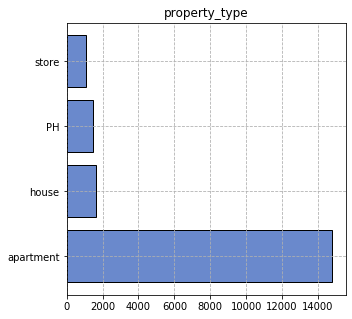

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('property_type')
ax.barh(data.loc[:,'property_type'].dropna().value_counts().index, data.loc[:,'property_type'].dropna().value_counts().values, color='#6A89CC', edgecolor='#000000')

(array([7.762e+03, 3.311e+03, 9.680e+02, 4.100e+02, 1.630e+02, 1.240e+02,
        9.200e+01, 6.100e+01, 4.900e+01, 1.400e+01, 1.400e+01, 2.000e+01,
        7.000e+00, 1.600e+01, 6.000e+00, 5.000e+00, 2.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([5.04330000e+03, 2.27164654e+05, 4.49286008e+05, 6.71407362e+05,
        8.93528716e+05, 1.11565007e+06, 1.33777142e+06, 1.55989278e+06,
        1.78201413e+06, 2.00413549e+06, 2.22625684e+06, 2.44837819e+06,
        2.67049955e+06, 2.89262090e+06, 3.11474226e+06, 3.33686361e+06,
        3.55898496e+06, 3.78110632e+06, 4.00322767e+06, 4.22534903e+06,
        4.447470

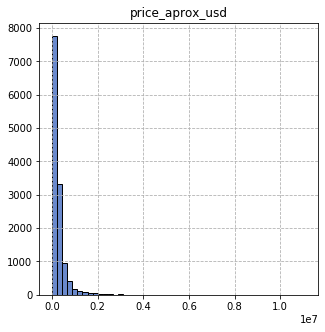

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('price_aprox_usd')
ax.hist(data.query('rooms < 10.0').loc[:,'price_aprox_usd'].dropna().values, bins=50, color='#6A89CC', edgecolor='#000000')

We see that there are some outliers for 'price_aprox_usd'. We will take this into account in the preprocess step.

(array([1.6569e+04, 9.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,   3680.,   7360.,  11040.,  14720.,  18400.,  22080.,
         25760.,  29440.,  33120.,  36800.,  40480.,  44160.,  47840.,
         51520.,  55200.,  58880.,  62560.,  66240.,  69920.,  73600.,
         77280.,  80960.,  84640.,  88320.,  92000.,  95680.,  99360.,
        103040., 106720., 110400.,

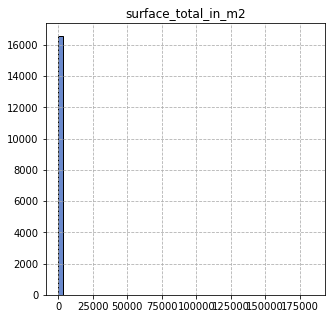

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('surface_total_in_m2')
ax.hist(data.loc[:,'surface_total_in_m2'].dropna().values, bins=50, color='#6A89CC', edgecolor='#000000')

(array([1.6854e+04, 1.3000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000000e+00, 3.0009800e+03, 6.0009600e+03, 9.0009400e+03,
        1.2000920e+04, 1.5000900e+04, 1.8000880e+04, 2.1000860e+04,
        2.4000840e+04, 2.7000820e+04, 3.0000800e+04, 3.3000780e+04,
        3.6000760e+04, 3.9000740e+04, 4.2000720e+04, 4.5000700e+04,
        4.8000680e+04, 5.1000660e+04, 5.400064

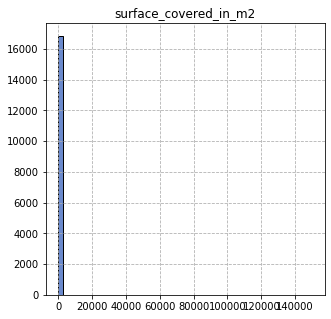

In [8]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('surface_covered_in_m2')
ax.hist(data.loc[:,'surface_covered_in_m2'].dropna().values, bins=50, color='#6A89CC', edgecolor='#000000')

<BarContainer object of 9 artists>

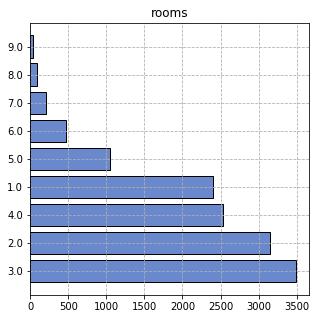

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('rooms')
ax.barh((data.query('rooms < 10.0').loc[:,'rooms'].dropna().value_counts().index).astype(str), data.query('rooms < 10.0').loc[:,'rooms'].dropna().value_counts().values, color='#6A89CC', edgecolor='#000000')

We see that there are some outliers for 'rooms'. We will take this into account in the preprocess step.

<BarContainer object of 48 artists>

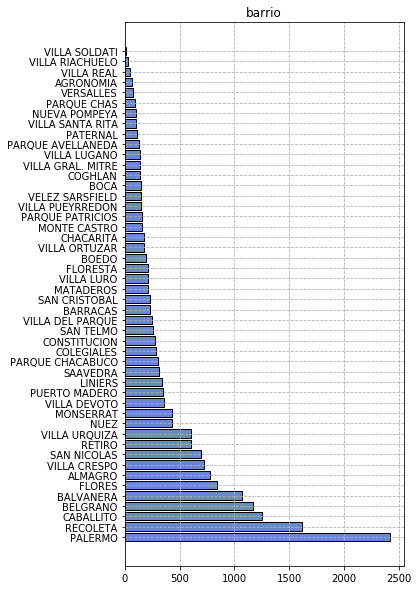

In [10]:
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('barrio')
ax.barh(data.loc[:,'barrio'].dropna().value_counts().index, data.loc[:,'barrio'].dropna().value_counts().values, color='#6A89CC', edgecolor='#000000')

In [11]:
data.loc[[18, 1560],:]

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,14.0
1560,2017-12-19,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5664783,-58.4341001",-34.566478,-58.434100,485000.0,130.0,120.0,3730.769231,NaN,4.0,NaN,https://www.properati.com.ar/1j3z7_venta_depar...,PALERMO,14.0


With further exploration we obtain two examples that show that the dataset is problematic in the sense that two almost identical apartments have quite different sale price. We will try to take this into account in order to reduce the impact on the performanse of the models.

-----

This function preprocess the dataset, creating and deleting features based on the past graphical analysis. This is done in preparation for the training and testing step.

In [12]:
def preprocess(data): 
    data = data.drop('created_on', axis=1, inplace=False)
    data = data.drop('operation', axis=1, inplace=False)
    data = data.drop('place_with_parent_names', axis=1, inplace=False)
    data = data.drop('lat-lon', axis=1, inplace=False)
    data = data.drop('lat', axis=1, inplace=False)
    data = data.drop('lon', axis=1, inplace=False)
    data = data.drop('price_usd_per_m2', axis=1, inplace=False)
    data = data.drop('floor', axis=1, inplace=False)
    data = data.drop('expenses', axis=1, inplace=False)
    data = data.drop('properati_url', axis=1, inplace=False)
    data = data.drop('comuna', axis=1, inplace=False)
    data = data.dropna(subset=['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','rooms']) 
    mu = np.mean(data.loc[:,'price_aprox_usd'].dropna().values)
    sigma = np.std(data.loc[:,'price_aprox_usd'].dropna().values)
    data = data.query('price_aprox_usd < {}'.format(mu+0.5*sigma))
    data = data.query('price_aprox_usd > {}'.format(mu-0.5*sigma))
    data = data.query('rooms < 10')
    data = pd.get_dummies(data)
    data = shuffle(data)
    return data

In [13]:
data = preprocess(data)
data.head()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,property_type_PH,property_type_apartment,property_type_house,property_type_store,barrio_AGRONOMIA,barrio_ALMAGRO,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
6563,131858.02,64.0,45.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9586,323103.26,104.0,67.0,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2805,280000.00,103.0,95.0,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,161000.00,45.0,38.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8300,209000.00,67.0,63.0,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 6563 to 671
Data columns (total 56 columns):
price_aprox_usd             8445 non-null float64
surface_total_in_m2         8445 non-null float64
surface_covered_in_m2       8445 non-null float64
rooms                       8445 non-null float64
property_type_PH            8445 non-null uint8
property_type_apartment     8445 non-null uint8
property_type_house         8445 non-null uint8
property_type_store         8445 non-null uint8
barrio_AGRONOMIA            8445 non-null uint8
barrio_ALMAGRO              8445 non-null uint8
barrio_BALVANERA            8445 non-null uint8
barrio_BARRACAS             8445 non-null uint8
barrio_BELGRANO             8445 non-null uint8
barrio_BOCA                 8445 non-null uint8
barrio_BOEDO                8445 non-null uint8
barrio_CABALLITO            8445 non-null uint8
barrio_CHACARITA            8445 non-null uint8
barrio_COGHLAN              8445 non-null uint8
barrio_COLEGIALES  

-----

Here we define the datasets for training and testing.

In [15]:
size = len(data)*80//100

In [16]:
X_train = (data.iloc[:size,1:].values).astype(float)
Y_train = (data.iloc[:size,[0]].values).astype(float)

X_test = (data.iloc[size:,1:].values).astype(float)
Y_test = (data.iloc[size:,[0]].values).astype(float)

In [17]:
b = np.max(X_train, axis=0)+0.000001
a = np.min(X_train, axis=0)-0.000001

-----

Here we train our first model and evaluate its performance. It is a KNN classifier with n=1 just to have a baseline model.

In [18]:
model_1 = Pipeline([('lambda', FunctionTransformer(lambda x:(x-a)/(b-a))),
                ('knn', KNeighborsRegressor(n_neighbors=1))])

model_1.fit(X_train, Y_train.flatten())

Pipeline(memory=None,
         steps=[('lambda',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function <lambda> at 0x7f9ebd9c12f0>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('knn',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=1, p=2,
                                     weights='uniform'))],
         verbose=False)

In [19]:
Y_train_pred = model_1.predict(X_train)

np.mean(np.abs(Y_train.flatten()-Y_train_pred))

3939.727769390172

In [20]:
Y_test_pred = model_1.predict(X_test)

np.mean(np.abs(Y_test.flatten()-Y_test_pred))

42748.84587329781

(array([359., 195., 192., 125., 113., 123.,  68.,  55.,  50.,  33.,  35.,
         60.,  29.,  30.,  27.,  20.,  11.,  18.,  15.,  18.,  17.,  10.,
         12.,  14.,   6.,   7.,   6.,   4.,   4.,   3.,   7.,   5.,   4.,
          3.,   2.,   2.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([     0.,   6700.,  13400.,  20100.,  26800.,  33500.,  40200.,
         46900.,  53600.,  60300.,  67000.,  73700.,  80400.,  87100.,
         93800., 100500., 107200., 113900., 120600., 127300., 134000.,
        140700., 147400., 154100., 160800., 167500., 174200., 180900.,
        187600., 194300., 201000., 207700., 214400., 221100., 227800.,
        234500., 241200., 247900., 254600., 261300., 268000., 274700.,
        281400., 288100., 294800., 301500., 308200., 314900., 321600.,
        328300., 335000.]),
 <a list of 50 Patch objects>)

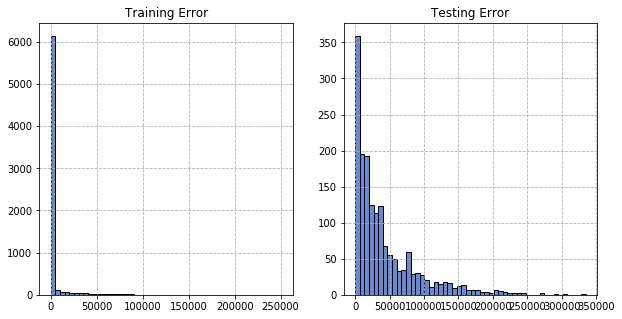

In [21]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Training Error')
ax1.hist(np.abs((Y_train.flatten()-Y_train_pred)), bins=50, color='#6A89CC', edgecolor='#000000')
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Testing Error')
ax2.hist(np.abs((Y_test.flatten()-Y_test_pred)), bins=50, color='#6A89CC', edgecolor='#000000')

We see that this model is heavely overfitting. Nevertheless, it is a 'quick and dirty' baseline model that gives us a testing error to beat. 

-----

Here we train our second model and evaluate its performance. It is a simple Decision Tree.

In [22]:
model_2 = Pipeline([('lambda', FunctionTransformer(lambda x:(x-a)/(b-a))),
                     ('adaboost', DecisionTreeRegressor())]) 

model_2.fit(X_train, Y_train.flatten())

Pipeline(memory=None,
         steps=[('lambda',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function <lambda> at 0x7f9ebda1b158>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('adaboost',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))

In [23]:
Y_train_pred = model_2.predict(X_train)

np.mean(np.abs(Y_train.flatten()-Y_train_pred))

3574.6518410442927

In [24]:
Y_test_pred = model_2.predict(X_test)

np.mean(np.abs(Y_test.flatten()-Y_test_pred))

42621.31172996137

(array([358., 171., 151., 133., 137.,  76.,  78.,  58.,  52.,  56.,  43.,
         42.,  55.,  28.,  32.,  25.,  21.,  15.,  14.,  11.,  22.,  12.,
         12.,  10.,  15.,   7.,   6.,   8.,   9.,   5.,   5.,   1.,   5.,
          1.,   1.,   3.,   3.,   2.,   0.,   1.,   3.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([     0.,   6220.,  12440.,  18660.,  24880.,  31100.,  37320.,
         43540.,  49760.,  55980.,  62200.,  68420.,  74640.,  80860.,
         87080.,  93300.,  99520., 105740., 111960., 118180., 124400.,
        130620., 136840., 143060., 149280., 155500., 161720., 167940.,
        174160., 180380., 186600., 192820., 199040., 205260., 211480.,
        217700., 223920., 230140., 236360., 242580., 248800., 255020.,
        261240., 267460., 273680., 279900., 286120., 292340., 298560.,
        304780., 311000.]),
 <a list of 50 Patch objects>)

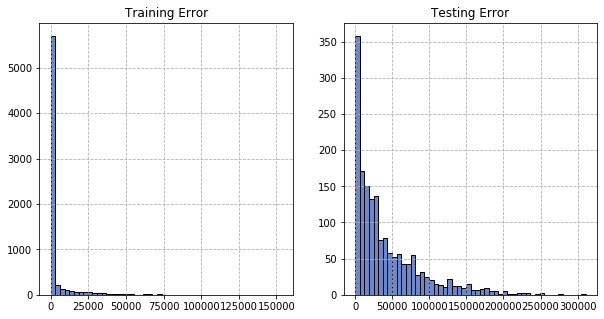

In [25]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Training Error')
ax1.hist(np.abs((Y_train.flatten()-Y_train_pred)), bins=50, color='#6A89CC', edgecolor='#000000')
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Testing Error')
ax2.hist(np.abs((Y_test.flatten()-Y_test_pred)), bins=50, color='#6A89CC', edgecolor='#000000')

We see that this model is performing worse than the last one and it is also heavely overfitting, so we discard it.

-----

Here we train our third model and evaluate its performance. It is a AdaBoost Regressor.

In [26]:
model_3 = Pipeline([('lambda', FunctionTransformer(lambda x:(x-a)/(b-a))),
                     ('adaboost', AdaBoostRegressor())]) 

model_3.fit(X_train, Y_train.flatten())

Pipeline(memory=None,
         steps=[('lambda',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function <lambda> at 0x7f9ebd80d048>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('adaboost',
                 AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                   loss='linear', n_estimators=50,
                                   random_state=None))],
         verbose=False)

In [27]:
Y_train_pred = model_3.predict(X_train)

np.mean(np.abs(Y_train.flatten()-Y_train_pred))

54994.28945460679

In [28]:
Y_test_pred = model_3.predict(X_test)

np.mean(np.abs(Y_test.flatten()-Y_test_pred))

56526.07668035368

(array([ 71.,  72.,  73.,  66.,  71.,  77.,  94., 102.,  89.,  96.,  72.,
         79.,  67.,  62.,  44.,  56.,  55.,  46.,  45.,  32.,  46.,  35.,
         31.,  21.,  30.,  18.,  24.,  17.,  14.,  13.,  15.,   8.,   8.,
          6.,   9.,   4.,   7.,   5.,   1.,   1.,   0.,   3.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([5.63000000e+00, 4.60501023e+03, 9.20439046e+03, 1.38037707e+04,
        1.84031509e+04, 2.30025311e+04, 2.76019114e+04, 3.22012916e+04,
        3.68006718e+04, 4.14000521e+04, 4.59994323e+04, 5.05988125e+04,
        5.51981928e+04, 5.97975730e+04, 6.43969532e+04, 6.89963334e+04,
        7.35957137e+04, 7.81950939e+04, 8.27944741e+04, 8.73938544e+04,
        9.19932346e+04, 9.65926148e+04, 1.01191995e+05, 1.05791375e+05,
        1.10390756e+05, 1.14990136e+05, 1.19589516e+05, 1.24188896e+05,
        1.28788276e+05, 1.33387657e+05, 1.37987037e+05, 1.42586417e+05,
        1.47185797e+05, 1.51785178e+05, 1.56384558e+05, 1.60983938e+05,
        1.

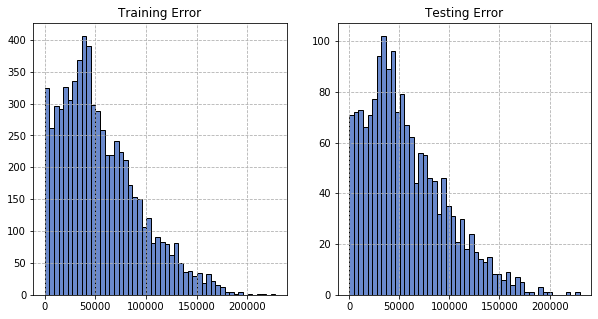

In [29]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Training Error')
ax1.hist(np.abs((Y_train.flatten()-Y_train_pred)), bins=50, color='#6A89CC', edgecolor='#000000')
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Testing Error')
ax2.hist(np.abs((Y_test.flatten()-Y_test_pred)), bins=50, color='#6A89CC', edgecolor='#000000')

We see that this model performing worse than the baseline model but it is not overfitting so hard, so it could be taken as a new baseline model to beat.

-----

Here we train our fourth model and evaluate its performance. It is a Neural Network.

In [30]:
def NN_1():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-a)/(b-a),
                                     input_shape=[X_train.shape[1]]))
    model.add(tf.keras.layers.Dense(units=256, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(Y_train.shape[1], 
                                    activation='linear', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='mse', metrics=['mae'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=1000, batch_size=64, callbacks=[callback1, callback2], verbose=True, validation_data=(X_test,Y_test))
    return model

In [31]:
model_4 = NN_1()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 55)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               14336     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 14,593
Trainable params: 14,593
Non-trainable params: 0
_________________________________________________________________
Train on 6756 samples, validate on 1689 samples
Epoch 1/1000
6756/6756 [==============================] - 0s 67us/sample - loss: 60106417539.4103 - mae: 224485.8281 - val_loss: 59521125534.2380 - val_mae: 223310.3281
Epoch 2/1000
6756/6756 [=========

6756/6756 [==============================] - 0s 22us/sample - loss: 6471413348.0355 - mae: 63852.2031 - val_loss: 6175090903.8342 - val_mae: 62027.0156
Epoch 45/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 6306987397.8354 - mae: 63321.3320 - val_loss: 6132346783.6021 - val_mae: 61762.4727
Epoch 46/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 6244795712.7200 - mae: 62731.3672 - val_loss: 6090908969.9846 - val_mae: 61554.7891
Epoch 47/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 6241313619.3629 - mae: 62832.5547 - val_loss: 6052339228.7981 - val_mae: 61270.3867
Epoch 48/1000
6756/6756 [==============================] - 0s 22us/sample - loss: 6206072423.5216 - mae: 62505.5312 - val_loss: 6014247478.5648 - val_mae: 60935.2148
Epoch 49/1000
6756/6756 [==============================] - 0s 22us/sample - loss: 6199869996.5613 - mae: 62383.5469 - val_loss: 5976461249.2504 - val_mae: 60584.1406
Epoch 50/1000
6756

6756/6756 [==============================] - 0s 26us/sample - loss: 5238190938.7898 - mae: 55797.9727 - val_loss: 5096651316.7460 - val_mae: 54519.7852
Epoch 94/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 5207241910.4890 - mae: 55737.4414 - val_loss: 5090518822.0438 - val_mae: 54486.1875
Epoch 95/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5228210247.2374 - mae: 55772.1445 - val_loss: 5084563230.7685 - val_mae: 54481.6719
Epoch 96/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5167144147.1356 - mae: 55371.5391 - val_loss: 5078940431.9147 - val_mae: 54395.0312
Epoch 97/1000
6756/6756 [==============================] - 0s 22us/sample - loss: 5201207033.4825 - mae: 55592.2266 - val_loss: 5074988547.9408 - val_mae: 54341.9336
Epoch 98/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 5211036166.9722 - mae: 55585.1523 - val_loss: 5068882355.3061 - val_mae: 54355.6719
Epoch 99/1000
6756

6756/6756 [==============================] - 0s 23us/sample - loss: 5172518761.4920 - mae: 55111.0898 - val_loss: 5002465702.8774 - val_mae: 53617.9219
Epoch 143/1000
6756/6756 [==============================] - 0s 23us/sample - loss: 5162474921.6057 - mae: 54998.3750 - val_loss: 5000735120.1421 - val_mae: 53651.3789
Epoch 144/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 5141652003.1640 - mae: 55014.1133 - val_loss: 5000183468.1824 - val_mae: 53654.1094
Epoch 145/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5151597522.5293 - mae: 54866.1641 - val_loss: 4999906470.1196 - val_mae: 53760.9297
Epoch 146/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5149078673.9609 - mae: 55184.4453 - val_loss: 4999516732.3245 - val_mae: 53640.1523
Epoch 147/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5166633192.6584 - mae: 55122.5703 - val_loss: 5002412199.3321 - val_mae: 53558.5898
Epoch 148/100

6756/6756 [==============================] - 0s 22us/sample - loss: 5156510203.7561 - mae: 55062.2461 - val_loss: 4995351973.3618 - val_mae: 53603.5195
Epoch 192/1000
6756/6756 [==============================] - 0s 22us/sample - loss: 5124196188.9118 - mae: 54845.2852 - val_loss: 4996860968.6205 - val_mae: 53569.0664
Epoch 193/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5112984465.9609 - mae: 54736.6406 - val_loss: 4996699070.2191 - val_mae: 53552.8945
Epoch 194/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 5088490475.8413 - mae: 54707.3125 - val_loss: 4995773765.8733 - val_mae: 53570.3711
Epoch 195/1000
6756/6756 [==============================] - 0s 22us/sample - loss: 5192960854.5459 - mae: 55120.4453 - val_loss: 4995908798.9769 - val_mae: 53623.7539
Epoch 196/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5146790139.3014 - mae: 55002.0352 - val_loss: 4996487472.6536 - val_mae: 53573.2422
Epoch 197/100

6756/6756 [==============================] - 0s 21us/sample - loss: 5202306519.6827 - mae: 55151.6719 - val_loss: 4997289107.3250 - val_mae: 53632.6875
Epoch 241/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5137699348.3102 - mae: 54876.6367 - val_loss: 4997669303.5500 - val_mae: 53585.1172
Epoch 242/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5148507239.6732 - mae: 54781.5430 - val_loss: 5000045990.5743 - val_mae: 53519.3750
Epoch 243/1000
6756/6756 [==============================] - 0s 22us/sample - loss: 5101750650.3162 - mae: 54757.9648 - val_loss: 4999322870.4512 - val_mae: 53506.3203
Epoch 244/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5062826718.5033 - mae: 54451.1250 - val_loss: 4996459584.5684 - val_mae: 53589.0273
Epoch 245/1000
6756/6756 [==============================] - 0s 20us/sample - loss: 5144807183.6116 - mae: 54973.2617 - val_loss: 4995237549.3949 - val_mae: 53621.1445
Epoch 246/100

6756/6756 [==============================] - 0s 22us/sample - loss: 5122952812.8265 - mae: 54974.3984 - val_loss: 4994572926.4085 - val_mae: 53476.0820
Epoch 290/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5128157317.9870 - mae: 54883.4531 - val_loss: 4994548931.5240 - val_mae: 53504.5195
Epoch 291/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5155321242.4488 - mae: 54955.0703 - val_loss: 4994812429.0349 - val_mae: 53505.0547
Epoch 292/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5099627563.6519 - mae: 54676.7773 - val_loss: 4993096239.2895 - val_mae: 53636.4062
Epoch 293/1000
6756/6756 [==============================] - 0s 28us/sample - loss: 5156718280.6773 - mae: 55037.1641 - val_loss: 4994805840.6347 - val_mae: 53515.8516
Epoch 294/1000
6756/6756 [==============================] - 0s 28us/sample - loss: 5073308551.3511 - mae: 54559.1250 - val_loss: 4993803494.9911 - val_mae: 53561.7891
Epoch 295/100

6756/6756 [==============================] - 0s 21us/sample - loss: 5105008134.0628 - mae: 54789.7773 - val_loss: 4996006209.3262 - val_mae: 53521.2773
Epoch 339/1000
6756/6756 [==============================] - 0s 20us/sample - loss: 5147980491.7087 - mae: 55012.9727 - val_loss: 4995800717.2623 - val_mae: 53534.2812
Epoch 340/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5120120594.3398 - mae: 54862.0312 - val_loss: 4995777922.1978 - val_mae: 53546.3867
Epoch 341/1000
6756/6756 [==============================] - 0s 23us/sample - loss: 5083313681.2789 - mae: 54507.2695 - val_loss: 4996326650.3919 - val_mae: 53517.6406
Epoch 342/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 5135157778.4914 - mae: 54994.4062 - val_loss: 4998798918.9343 - val_mae: 53437.8398
Epoch 343/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5120715072.7200 - mae: 54651.8633 - val_loss: 4994655151.3653 - val_mae: 53537.7188
Epoch 344/100

6756/6756 [==============================] - 0s 25us/sample - loss: 5134330456.2131 - mae: 54853.0273 - val_loss: 4993547237.0207 - val_mae: 53540.6875
Epoch 388/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5148653425.8283 - mae: 54897.4258 - val_loss: 4993683024.0284 - val_mae: 53539.2109
Epoch 389/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 5150825543.6921 - mae: 54969.3789 - val_loss: 4993746406.8396 - val_mae: 53530.9492
Epoch 390/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5120219926.5838 - mae: 54895.8281 - val_loss: 4993806418.4535 - val_mae: 53531.8164
Epoch 391/1000
6756/6756 [==============================] - 0s 22us/sample - loss: 5105452265.4162 - mae: 54607.7969 - val_loss: 4993703808.6821 - val_mae: 53531.8320
Epoch 392/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 5119877581.9822 - mae: 54574.3125 - val_loss: 4993658135.1901 - val_mae: 53539.7578
Epoch 393/100

6756/6756 [==============================] - 0s 23us/sample - loss: 5189262359.6448 - mae: 55075.8711 - val_loss: 4993215494.0628 - val_mae: 53543.0781
Epoch 437/1000
6756/6756 [==============================] - 0s 19us/sample - loss: 5161690500.6229 - mae: 55102.2812 - val_loss: 4993245084.5708 - val_mae: 53534.9766
Epoch 438/1000
6756/6756 [==============================] - 0s 23us/sample - loss: 5119853383.0858 - mae: 54642.3320 - val_loss: 4993221744.1610 - val_mae: 53537.2969
Epoch 439/1000
6756/6756 [==============================] - 0s 23us/sample - loss: 5133171603.1735 - mae: 55020.1719 - val_loss: 4993256508.3245 - val_mae: 53531.4062
Epoch 440/1000
6756/6756 [==============================] - 0s 23us/sample - loss: 5172000150.2049 - mae: 55001.8086 - val_loss: 4993191149.6602 - val_mae: 53537.2188
Epoch 441/1000
6756/6756 [==============================] - 0s 21us/sample - loss: 5150841618.3398 - mae: 54804.3086 - val_loss: 4993365124.1681 - val_mae: 53525.7109
Epoch 442/100

In [32]:
Y_train_pred = model_4.predict(X_train)

np.mean(np.abs(Y_train-Y_train_pred))

52038.059170274566


In [33]:
Y_test_pred = model_4.predict(X_test)

np.mean(np.abs(Y_test-Y_test_pred))

51789.953570274566


(array([144., 119., 116., 123., 138., 114., 117.,  94.,  88.,  85.,  72.,
         66.,  51.,  46.,  41.,  38.,  43.,  27.,  18.,  10.,  15.,  16.,
         11.,  10.,   8.,  10.,   5.,   9.,   4.,   9.,   8.,   6.,   6.,
          6.,   4.,   5.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          3.,   0.,   0.,   1.,   0.,   1.]),
 array([3.46875000e+00, 6.15337062e+03, 1.23032725e+04, 1.84531744e+04,
        2.46030762e+04, 3.07529781e+04, 3.69028800e+04, 4.30527819e+04,
        4.92026837e+04, 5.53525856e+04, 6.15024875e+04, 6.76523894e+04,
        7.38022912e+04, 7.99521931e+04, 8.61020950e+04, 9.22519969e+04,
        9.84018987e+04, 1.04551801e+05, 1.10701702e+05, 1.16851604e+05,
        1.23001506e+05, 1.29151408e+05, 1.35301310e+05, 1.41451212e+05,
        1.47601114e+05, 1.53751016e+05, 1.59900917e+05, 1.66050819e+05,
        1.72200721e+05, 1.78350623e+05, 1.84500525e+05, 1.90650427e+05,
        1.96800329e+05, 2.02950231e+05, 2.09100132e+05, 2.15250034e+05,
        2.

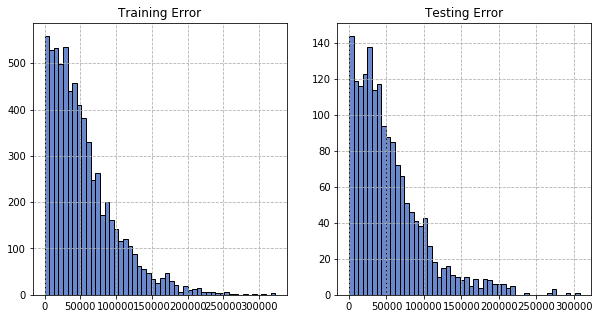

In [34]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Training Error')
ax1.hist(np.abs(Y_train-Y_train_pred), bins=50, color='#6A89CC', edgecolor='#000000')
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Testing Error')
ax2.hist(np.abs(Y_test-Y_test_pred), bins=50, color='#6A89CC', edgecolor='#000000')

We see that this model is performing better than the last one, so we take it as the new baseline model to beat.

-----

Here we define our fifth model and evaluate its performance. This new model will boost the last model. It will be an ensemble of that one and the one we trained.

In [35]:
R_train_1 = Y_train - model_4.predict(X_train)

In [36]:
def NN_2():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-a)/(b-a),
                                     input_shape=[X_train.shape[1]]))
    model.add(tf.keras.layers.Dense(units=256, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=256, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(R_train_1.shape[1], 
                                    activation='linear', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='mse', metrics=['mae'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(X_train, R_train_1, epochs=1000, batch_size=64, callbacks=[callback1, callback2], verbose=True)
    return model

In [37]:
class Model_5():
    
    def __init__(self):
        self.nn = NN_2()
    
    def predict(self, X):
        A1 = model_4.predict(X)
        A2 = self.nn.predict(X)
        return A1+A2

In [38]:
model_5 = Model_5()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 55)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               14336     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 80,385
Trainable params: 80,385
Non-trainable params: 0
__________________________________________________

6756/6756 [==============================] - 0s 27us/sample - loss: 4383102443.6898 - mae: 49916.3047
Epoch 62/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 4358617642.7425 - mae: 49672.5859
Epoch 63/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 4375310473.3215 - mae: 49894.4844
Epoch 64/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 4370247539.9503 - mae: 49727.8281
Epoch 65/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4368099575.0574 - mae: 49719.3906
Epoch 66/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 4371799597.7738 - mae: 49841.7188
Epoch 67/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4372988299.2919 - mae: 49805.6211
Epoch 68/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 4389340456.1658 - mae: 49865.6289
Epoch 69/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4390

6756/6756 [==============================] - 0s 28us/sample - loss: 4321067968.7957 - mae: 49369.2930
Epoch 132/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 4301700466.7377 - mae: 49182.4258
Epoch 133/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 4304403613.9349 - mae: 49369.1328
Epoch 134/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4313459401.9657 - mae: 49304.2812
Epoch 135/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 4315819144.7152 - mae: 49408.4883
Epoch 136/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4293713307.9645 - mae: 49161.2227
Epoch 137/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4309518176.8526 - mae: 49158.8438
Epoch 138/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4288832017.5820 - mae: 49329.3438
Epoch 139/1000
6756/6756 [==============================] - 0s 25us/sample - lo

6756/6756 [==============================] - 0s 26us/sample - loss: 4269437446.0628 - mae: 48973.5469
Epoch 202/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 4247825065.7573 - mae: 49002.9727
Epoch 203/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 4275454113.8757 - mae: 49072.9844
Epoch 204/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4286164779.8034 - mae: 49097.4023
Epoch 205/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 4255640139.7845 - mae: 49041.1211
Epoch 206/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4253996916.7081 - mae: 48983.6016
Epoch 207/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 4250322034.5861 - mae: 48931.8789
Epoch 208/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4289467545.9941 - mae: 49269.2070
Epoch 209/1000
6756/6756 [==============================] - 0s 27us/sample - lo

6756/6756 [==============================] - 0s 25us/sample - loss: 4227182639.2895 - mae: 48737.0000
Epoch 272/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4221993387.5761 - mae: 48623.1328
Epoch 273/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4246148241.2031 - mae: 48809.2109
Epoch 274/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4215824760.1942 - mae: 48655.2266
Epoch 275/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4224264701.8780 - mae: 48699.3828
Epoch 276/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 4222135439.3843 - mae: 48591.8906
Epoch 277/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 4232921594.9982 - mae: 48728.7383
Epoch 278/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4233374616.0237 - mae: 48722.5430
Epoch 279/1000
6756/6756 [==============================] - 0s 24us/sample - lo

6756/6756 [==============================] - 0s 26us/sample - loss: 4174399782.0438 - mae: 48328.2070
Epoch 342/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4197014272.1516 - mae: 48435.5859
Epoch 343/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 4171973658.3730 - mae: 48438.9375
Epoch 344/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 4163432237.6223 - mae: 48116.1641
Epoch 345/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 4194236750.0580 - mae: 48435.0586
Epoch 346/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 4173359931.5666 - mae: 48336.6484
Epoch 347/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 4170724385.0420 - mae: 48316.5742
Epoch 348/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 4171527708.0403 - mae: 48155.6562
Epoch 349/1000
6756/6756 [==============================] - 0s 26us/sample - lo

6756/6756 [==============================] - 0s 25us/sample - loss: 3941807309.0728 - mae: 46939.1562
Epoch 412/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3954717951.8484 - mae: 46779.8711
Epoch 413/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3941418522.6761 - mae: 47044.6836
Epoch 414/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3929724117.1060 - mae: 46726.0820
Epoch 415/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3937369352.9426 - mae: 46851.8633
Epoch 416/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3939737465.5583 - mae: 47053.1211
Epoch 417/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3940056682.7046 - mae: 46747.5195
Epoch 418/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3937574963.5335 - mae: 46741.9570
Epoch 419/1000
6756/6756 [==============================] - 0s 29us/sample - lo

6756/6756 [==============================] - 0s 26us/sample - loss: 3524293794.6335 - mae: 44198.6875
Epoch 482/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3536985454.7969 - mae: 44319.9336
Epoch 483/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 3526303911.7869 - mae: 44255.8047
Epoch 484/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3522856050.2830 - mae: 44160.1562
Epoch 485/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3527000799.4127 - mae: 44197.1016
Epoch 486/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3493899756.4476 - mae: 44006.7266
Epoch 487/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 3484964259.5429 - mae: 43904.1641
Epoch 488/1000
6756/6756 [==============================] - 0s 28us/sample - loss: 3540876861.2339 - mae: 44173.2148
Epoch 489/1000
6756/6756 [==============================] - 0s 25us/sample - lo

6756/6756 [==============================] - 0s 28us/sample - loss: 3203979557.7407 - mae: 42033.4219
Epoch 552/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3277083867.7750 - mae: 42455.6133
Epoch 553/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3308340798.5980 - mae: 42759.7695
Epoch 554/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 3222257412.8502 - mae: 42001.8750
Epoch 555/1000
6756/6756 [==============================] - 0s 29us/sample - loss: 3248338295.7395 - mae: 42428.9531
Epoch 556/1000
6756/6756 [==============================] - 0s 28us/sample - loss: 3306866493.3854 - mae: 42618.5352
Epoch 557/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3262901097.6436 - mae: 42676.9727
Epoch 558/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3261105358.1338 - mae: 42337.5625
Epoch 559/1000
6756/6756 [==============================] - 0s 25us/sample - lo

6756/6756 [==============================] - 0s 26us/sample - loss: 3261266639.4979 - mae: 42279.3594
Epoch 622/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3271275223.3795 - mae: 42347.3438
Epoch 623/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 3233167138.1030 - mae: 42221.3281
Epoch 624/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3142323649.5536 - mae: 41580.6055
Epoch 625/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3186705614.5127 - mae: 41943.4453
Epoch 626/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3218535451.8887 - mae: 42113.9883
Epoch 627/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3109196644.1871 - mae: 41236.0859
Epoch 628/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3137938429.5749 - mae: 41524.3711
Epoch 629/1000
6756/6756 [==============================] - 0s 25us/sample - lo

6756/6756 [==============================] - 0s 26us/sample - loss: 3122708479.0906 - mae: 41110.5156
Epoch 692/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3147088931.1640 - mae: 41348.6602
Epoch 693/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3091689611.4435 - mae: 41144.5156
Epoch 694/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3069680241.9799 - mae: 40927.1797
Epoch 695/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3061853158.0817 - mae: 40778.7266
Epoch 696/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 3142799818.9509 - mae: 41355.9219
Epoch 697/1000
6756/6756 [==============================] - 0s 23us/sample - loss: 3091683990.9627 - mae: 41202.2305
Epoch 698/1000
6756/6756 [==============================] - 0s 23us/sample - loss: 3151375960.2131 - mae: 41516.0625
Epoch 699/1000
6756/6756 [==============================] - 0s 23us/sample - lo

6756/6756 [==============================] - 0s 26us/sample - loss: 3105974707.3061 - mae: 41146.1562
Epoch 762/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3032254128.2747 - mae: 40472.9375
Epoch 763/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3077822627.0882 - mae: 41020.3906
Epoch 764/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3126708467.4198 - mae: 41361.4258
Epoch 765/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3119253968.4073 - mae: 41477.0273
Epoch 766/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3052190244.5281 - mae: 40834.4375
Epoch 767/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3130255478.8301 - mae: 41102.7227
Epoch 768/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3153064282.7898 - mae: 41508.2070
Epoch 769/1000
6756/6756 [==============================] - 0s 27us/sample - lo

6756/6756 [==============================] - 0s 25us/sample - loss: 3071517301.0112 - mae: 40956.0625
Epoch 832/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3047136819.2303 - mae: 40896.1602
Epoch 833/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3150644683.7087 - mae: 41573.6445
Epoch 834/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3156519553.4399 - mae: 41497.3398
Epoch 835/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3107436834.4062 - mae: 40982.9766
Epoch 836/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3102460258.0651 - mae: 40977.6562
Epoch 837/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3053074325.9017 - mae: 40822.0391
Epoch 838/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3103131616.1705 - mae: 41143.2812
Epoch 839/1000
6756/6756 [==============================] - 0s 26us/sample - lo

6756/6756 [==============================] - 0s 25us/sample - loss: 2998852700.3055 - mae: 40475.9414
Epoch 902/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3054080614.8396 - mae: 40744.7578
Epoch 903/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3047271271.2185 - mae: 40755.7852
Epoch 904/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 3099269533.7833 - mae: 40985.9023
Epoch 905/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3060034978.3304 - mae: 40553.3828
Epoch 906/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3083609268.6702 - mae: 40882.1992
Epoch 907/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 3063580850.2451 - mae: 40819.1797
Epoch 908/1000
6756/6756 [==============================] - 0s 24us/sample - loss: 3005893113.6341 - mae: 40507.8359
Epoch 909/1000
6756/6756 [==============================] - 0s 26us/sample - lo

6756/6756 [==============================] - 0s 26us/sample - loss: 2781776967.2374 - mae: 38857.2188
Epoch 972/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 2699788701.4423 - mae: 38094.9961
Epoch 973/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 2713567456.0189 - mae: 38408.6289
Epoch 974/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 2740742093.0728 - mae: 38571.9375
Epoch 975/1000
6756/6756 [==============================] - 0s 27us/sample - loss: 2696141615.0622 - mae: 38200.0469
Epoch 976/1000
6756/6756 [==============================] - 0s 28us/sample - loss: 2740363520.7578 - mae: 38373.6055
Epoch 977/1000
6756/6756 [==============================] - 0s 26us/sample - loss: 2716832344.8194 - mae: 38287.4609
Epoch 978/1000
6756/6756 [==============================] - 0s 25us/sample - loss: 2746950122.7803 - mae: 38487.5898
Epoch 979/1000
6756/6756 [==============================] - 0s 25us/sample - lo

In [39]:
Y_train_pred = model_5.predict(X_train)

np.mean(np.abs(Y_train-Y_train_pred))

37038.456670274566


In [40]:
Y_test_pred = model_5.predict(X_test)

np.mean(np.abs(Y_test-Y_test_pred))

38711.744970273133


(array([205., 211., 179., 161., 181., 124.,  99.,  97.,  81.,  52.,  44.,
         40.,  30.,  29.,  14.,  18.,  27.,   6.,  10.,  13.,  12.,   7.,
          5.,   9.,   5.,   6.,   3.,   4.,   4.,   1.,   2.,   1.,   0.,
          3.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([3.86562500e+01, 6.46257969e+03, 1.28865031e+04, 1.93104266e+04,
        2.57343500e+04, 3.21582734e+04, 3.85821969e+04, 4.50061203e+04,
        5.14300437e+04, 5.78539672e+04, 6.42778906e+04, 7.07018141e+04,
        7.71257375e+04, 8.35496609e+04, 8.99735844e+04, 9.63975078e+04,
        1.02821431e+05, 1.09245355e+05, 1.15669278e+05, 1.22093202e+05,
        1.28517125e+05, 1.34941048e+05, 1.41364972e+05, 1.47788895e+05,
        1.54212819e+05, 1.60636742e+05, 1.67060666e+05, 1.73484589e+05,
        1.79908512e+05, 1.86332436e+05, 1.92756359e+05, 1.99180283e+05,
        2.05604206e+05, 2.12028130e+05, 2.18452053e+05, 2.24875977e+05,
        2.

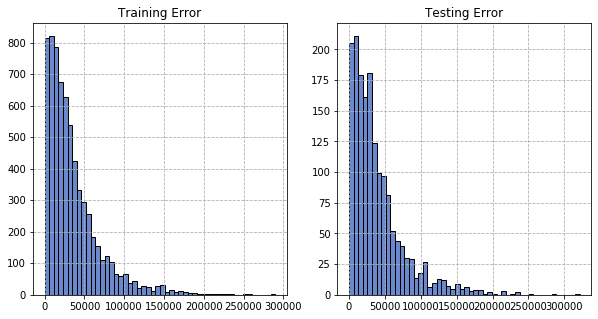

In [41]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Training Error')
ax1.hist(np.abs(Y_train-Y_train_pred), bins=50, color='#6A89CC', edgecolor='#000000')
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Testing Error')
ax2.hist(np.abs(Y_test-Y_test_pred), bins=50, color='#6A89CC', edgecolor='#000000')

We see that this model is performing better than the last one. It is overfitting a bit but nevertheless we take it as the new baseline model to beat.

-----

Here we define our sixth and last model and evaluate its performance. This new model will boost the last model. It will be an ensemble of that one and the one we trained.

In [42]:
R_train_2 = Y_train - model_5.predict(X_train)

In [43]:
def NN_3():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-a)/(b-a),
                                     input_shape=[X_train.shape[1]]))
    model.add(tf.keras.layers.Dense(units=256, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=256, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=256, 
                                    activation='relu', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(R_train_2.shape[1], 
                                    activation='linear', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='mse', metrics=['mae'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(X_train, R_train_2, epochs=1000, batch_size=64, callbacks=[callback1, callback2], verbose=True)
    return model

In [44]:
class Model_6():
    
    def __init__(self):
        self.nn = NN_3()
    
    def predict(self, X):
        A1 = model_5.predict(X)
        A2 = self.nn.predict(X)
        return A1+A2

In [45]:
model_6 = Model_6()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 55)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               14336     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

6756/6756 [==============================] - 0s 36us/sample - loss: 2363676697.6152 - mae: 35535.7578
Epoch 60/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2365621675.2729 - mae: 35541.7305
Epoch 61/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2365871983.4032 - mae: 35508.6953
Epoch 62/1000
6756/6756 [==============================] - 0s 37us/sample - loss: 2370153881.3120 - mae: 35524.6250
Epoch 63/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2370710031.0053 - mae: 35434.1250
Epoch 64/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2365811569.2220 - mae: 35455.7305
Epoch 65/1000
6756/6756 [==============================] - 0s 31us/sample - loss: 2364987558.4227 - mae: 35532.8828
Epoch 66/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2369096118.0343 - mae: 35555.8828
Epoch 67/1000
6756/6756 [==============================] - 0s 39us/sample - loss: 2367

6756/6756 [==============================] - 0s 32us/sample - loss: 2365333175.0953 - mae: 35459.9141
Epoch 130/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2362624223.0337 - mae: 35419.3477
Epoch 131/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2363424964.6607 - mae: 35416.1836
Epoch 132/1000
6756/6756 [==============================] - 0s 35us/sample - loss: 2361642924.0308 - mae: 35421.6133
Epoch 133/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2367523846.8964 - mae: 35434.5234
Epoch 134/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2362673008.6157 - mae: 35467.7070
Epoch 135/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2362446495.8295 - mae: 35357.5781
Epoch 136/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2365051581.8022 - mae: 35432.1406
Epoch 137/1000
6756/6756 [==============================] - 0s 33us/sample - lo

6756/6756 [==============================] - 0s 35us/sample - loss: 2360307532.8455 - mae: 35472.3750
Epoch 200/1000
6756/6756 [==============================] - 0s 42us/sample - loss: 2363218077.3286 - mae: 35380.1484
Epoch 201/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2356249425.2410 - mae: 35373.5664
Epoch 202/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2361349880.4973 - mae: 35420.4844
Epoch 203/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2359490737.3357 - mae: 35341.0117
Epoch 204/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2364151988.5944 - mae: 35457.4375
Epoch 205/1000
6756/6756 [==============================] - 0s 37us/sample - loss: 2363117236.7460 - mae: 35374.1641
Epoch 206/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2363400583.9574 - mae: 35436.4062
Epoch 207/1000
6756/6756 [==============================] - 0s 35us/sample - lo

6756/6756 [==============================] - 0s 33us/sample - loss: 2362992622.2664 - mae: 35403.0000
Epoch 270/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2362283434.0604 - mae: 35383.9883
Epoch 271/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2355966433.6862 - mae: 35334.0977
Epoch 272/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2360838439.3321 - mae: 35406.2969
Epoch 273/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2356554912.9663 - mae: 35339.6719
Epoch 274/1000
6756/6756 [==============================] - 0s 35us/sample - loss: 2359026014.4275 - mae: 35406.3242
Epoch 275/1000
6756/6756 [==============================] - 0s 39us/sample - loss: 2360398913.1747 - mae: 35416.8711
Epoch 276/1000
6756/6756 [==============================] - 0s 39us/sample - loss: 2361720444.5139 - mae: 35391.1836
Epoch 277/1000
6756/6756 [==============================] - 0s 37us/sample - lo

6756/6756 [==============================] - 0s 33us/sample - loss: 2357121735.0101 - mae: 35390.2695
Epoch 340/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2361688444.8928 - mae: 35373.1211
Epoch 341/1000
6756/6756 [==============================] - 0s 35us/sample - loss: 2357405337.6909 - mae: 35405.0898
Epoch 342/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2361105989.8733 - mae: 35299.9180
Epoch 343/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2362098794.7046 - mae: 35414.1523
Epoch 344/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2358332617.8899 - mae: 35411.7734
Epoch 345/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2358646431.6779 - mae: 35339.5430
Epoch 346/1000
6756/6756 [==============================] - 0s 36us/sample - loss: 2360308612.1681 - mae: 35382.1172
Epoch 347/1000
6756/6756 [==============================] - 0s 32us/sample - lo

6756/6756 [==============================] - 0s 34us/sample - loss: 2357436062.3896 - mae: 35373.7695
Epoch 410/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2359828410.5814 - mae: 35364.1172
Epoch 411/1000
6756/6756 [==============================] - 0s 31us/sample - loss: 2352095470.5696 - mae: 35303.8398
Epoch 412/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2360815044.1303 - mae: 35358.6211
Epoch 413/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2357815577.5394 - mae: 35313.6211
Epoch 414/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2356418802.8135 - mae: 35332.2539
Epoch 415/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2358930350.0012 - mae: 35366.9883
Epoch 416/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2357735474.6240 - mae: 35322.5234
Epoch 417/1000
6756/6756 [==============================] - 0s 31us/sample - lo

6756/6756 [==============================] - 0s 33us/sample - loss: 2352959480.5731 - mae: 35312.8711
Epoch 480/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2355688785.3168 - mae: 35310.8633
Epoch 481/1000
6756/6756 [==============================] - 0s 29us/sample - loss: 2352518255.5548 - mae: 35311.6602
Epoch 482/1000
6756/6756 [==============================] - 0s 30us/sample - loss: 2353853612.9402 - mae: 35325.8359
Epoch 483/1000
6756/6756 [==============================] - 0s 28us/sample - loss: 2354542952.1279 - mae: 35335.0586
Epoch 484/1000
6756/6756 [==============================] - 0s 29us/sample - loss: 2350575977.3404 - mae: 35340.2070
Epoch 485/1000
6756/6756 [==============================] - 0s 29us/sample - loss: 2356152657.5441 - mae: 35321.6055
Epoch 486/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2355557415.1048 - mae: 35352.9219
Epoch 487/1000
6756/6756 [==============================] - 0s 32us/sample - lo

6756/6756 [==============================] - 0s 35us/sample - loss: 2354193479.0101 - mae: 35363.7148
Epoch 550/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2352384117.0112 - mae: 35317.7188
Epoch 551/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2351709609.8330 - mae: 35317.5117
Epoch 552/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2349545916.3245 - mae: 35275.2344
Epoch 553/1000
6756/6756 [==============================] - 0s 37us/sample - loss: 2357499579.1877 - mae: 35363.5742
Epoch 554/1000
6756/6756 [==============================] - 0s 36us/sample - loss: 2351049987.7134 - mae: 35309.2227
Epoch 555/1000
6756/6756 [==============================] - 0s 34us/sample - loss: 2352013708.3529 - mae: 35338.2695
Epoch 556/1000
6756/6756 [==============================] - 0s 35us/sample - loss: 2348770689.7430 - mae: 35287.8438
Epoch 557/1000
6756/6756 [==============================] - 0s 34us/sample - lo

6756/6756 [==============================] - 0s 34us/sample - loss: 2350031608.2700 - mae: 35318.0781
Epoch 620/1000
6756/6756 [==============================] - 0s 35us/sample - loss: 2354656719.4979 - mae: 35312.1406
Epoch 621/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2352738334.0107 - mae: 35322.3008
Epoch 622/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2352452778.9698 - mae: 35320.1758
Epoch 623/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2353392371.6471 - mae: 35313.2539
Epoch 624/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2353783444.0071 - mae: 35342.5430
Epoch 625/1000
6756/6756 [==============================] - 0s 32us/sample - loss: 2351663053.0728 - mae: 35284.9414
Epoch 626/1000
6756/6756 [==============================] - 0s 33us/sample - loss: 2348858796.7128 - mae: 35292.4961
Epoch 627/1000
6756/6756 [==============================] - 0s 32us/sample - lo

6756/6756 [==============================] - 0s 34us/sample - loss: 2353981013.9396 - mae: 35320.9805


In [46]:
Y_train_pred = model_6.predict(X_train)

np.mean(np.abs(Y_train-Y_train_pred))

33230.53258926199


In [47]:
Y_test_pred = model_6.predict(X_test)

np.mean(np.abs(Y_test-Y_test_pred))

32942.25261992857


(array([210., 200., 168., 155., 177., 135., 106.,  88.,  85.,  62.,  45.,
         46.,  26.,  33.,  12.,  23.,  21.,  10.,   9.,  14.,   9.,   4.,
          9.,   7.,   6.,   5.,   4.,   4.,   5.,   0.,   2.,   0.,   0.,
          1.,   1.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([2.60937500e+00, 6.39749781e+03, 1.27923862e+04, 1.91872747e+04,
        2.55821631e+04, 3.19770516e+04, 3.83719400e+04, 4.47668284e+04,
        5.11617169e+04, 5.75566053e+04, 6.39514937e+04, 7.03463822e+04,
        7.67412706e+04, 8.31361591e+04, 8.95310475e+04, 9.59259359e+04,
        1.02320824e+05, 1.08715713e+05, 1.15110601e+05, 1.21505490e+05,
        1.27900378e+05, 1.34295267e+05, 1.40690155e+05, 1.47085043e+05,
        1.53479932e+05, 1.59874820e+05, 1.66269709e+05, 1.72664597e+05,
        1.79059486e+05, 1.85454374e+05, 1.91849262e+05, 1.98244151e+05,
        2.04639039e+05, 2.11033928e+05, 2.17428816e+05, 2.23823705e+05,
        2.

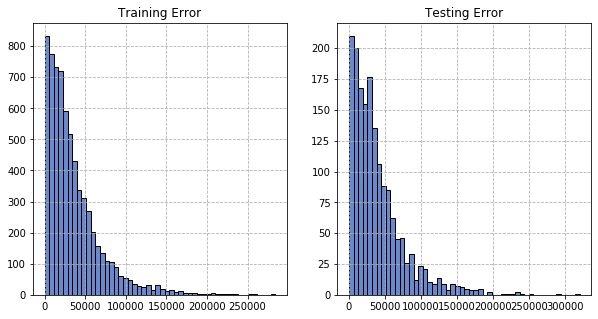

In [48]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(b=True, linestyle='--')
ax1.set_title('Training Error')
ax1.hist(np.abs(Y_train-Y_train_pred), bins=50, color='#6A89CC', edgecolor='#000000')
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(b=True, linestyle='--')
ax2.set_title('Testing Error')
ax2.hist(np.abs(Y_test-Y_test_pred), bins=50, color='#6A89CC', edgecolor='#000000')

We see that this model is performing much better than the last one.

#### This last model could be considered a candidate solution for the original problem presented. Additional exploration of hyperparameters would be necessary to make a final conclusion.